# Importing Libraries and Data

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Model Selection and Training
from sklearn.preprocessing import LabelEncoder
from pmdarima.arima import ndiffs, nsdiffs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Project Goals and Steps

1. Data Collection and Cleaning

* Gather relevant data, such as sales records and store attributes.
Integrate these datasets into a unified dataset.
* Clean the data by removing duplicates and correcting inconsistencies.
* Identify and handle missing values through imputation or removal as needed.

2. Exploratory Data Analysis (EDA)

* Inspect the dataset to identify patterns, trends, and potential anomalies.
* Use visualizations like histograms and time series plots to understand data distributions and behavior.
* Analyze sales by different store segments.

3. Outlier Detection

* Decide on appropriate treatment for outliers, whether by removal, transformation, or imputation.

4. Stationarity Tests

* Perform tests such as KPSS, ADF, OCSB, and CH to check for stationarity, a key requirement for many time series models.

5. Label Encoding

* Convert categorical variables into numerical labels to make them suitable for machine learning models.

6. Correlation Analysis

* Calculate correlations between variables to understand their relationships and identify potential multicollinearity issues.

7. Model Selection with Cross-Validation

* Evaluate different models (Ridge, Lasso, RandomForestRegressor, DecisionTreeRegressor, KNeighborsRegressor) using cross-validation, optimizing performance based on negative mean absolute error (neg_mean_absolute_error).

8. Hyperparameter Tuning with GridSearchCV

* Use GridSearchCV to search for the best parameters for the selected model, improving its performance.

9. Model Evaluation

* Assess model accuracy and performance using metrics like MSE, MAE, and R².

10. Precision for 12-Month Forecast

* Verify the model's precision over a 12-month prediction horizon and adjust as necessary to ensure reliable forecasts.

# Data Collection and Preprocessing:

In [4]:
dfvendas = pd.read_excel('/content/drive/My Drive/Portfólio/Store Sales/Vendas.xlsx')

In [5]:
dfvendas

,Mall,Cod_client,Sales,Categoria,Segmento,Tipo de Locação,Classificação,Data,Ano,Mês
0,Mall6,10491,74180.94,Lojas Satélite,Alimentação e Bebidas,SUC,Fast-Food,2018-01-01,2018,1
1,Mall12,10537,302392.82,Lojas Satélite,Telefonia e Acessórios,SUC,Telefonia Geral,2018-01-01,2018,1
2,Mall5,10736,219258.10,Lojas Satélite,Telefonia e Acessórios,SUC,Telefonia Geral,2018-01-01,2018,1
3,Mall4,12905,7280.00,Conveniência/Serviços,Outros Serviços,MÍDIA MALL,NaN,2018-01-01,2018,1
4,Mall2,13794,106048.76,Lojas Satélite,Alimentação e Bebidas,SUC,Fast-Food,2018-01-01,2018,1
...,...,...,...,...,...,...,...,...,...,...
80710,Mall1,686360,10870.57,Conveniência/Serviços,Lavanderia,SUC,NaN,2024-07-01,2024,7
80711,Mall3,686640,13192.06,Lojas Satélite,Relojoarias e Joalherias,SUC,Relojoarias e Joalherias,2024-07-01,2024,7
80712,Mall5,687695,192878.30,Lojas Satélite,Calçados,SUC,Calçados Geral,2024-07-01,2024,7
80713,Mall7,687995,19999.52,Lojas Satélite,Vestuário,SUC,Acessórios para Vestuário,2024-07-01,2024,7


In [6]:
dfvendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80715 entries, 0 to 80714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mall             80715 non-null  object        
 1   Cod_client       80715 non-null  int64         
 2   Sales            80715 non-null  float64       
 3   Categoria        80715 non-null  object        
 4   Segmento         80715 non-null  object        
 5   Tipo de Locação  80715 non-null  object        
 6   Classificação    59223 non-null  object        
 7   Data             80715 non-null  datetime64[ns]
 8   Ano              80715 non-null  int64         
 9   Mês              80715 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.2+ MB


In [7]:
dfvendas.describe(include='all')

,Mall,Cod_client,Sales,Categoria,Segmento,Tipo de Locação,Classificação,Data,Ano,Mês
count,80715,80715.000000,8.071500e+04,80715,80715,80715,59223,80715,80715.000000,80715.000000
unique,14,NaN,NaN,6,46,5,36,NaN,NaN,NaN
top,Mall9,NaN,NaN,Lojas Satélite,Alimentação e Bebidas,SUC,Fast-Food,NaN,NaN,NaN
freq,15182,NaN,NaN,59223,15807,70838,6914,NaN,NaN,NaN
mean,NaN,104431.677953,1.921531e+05,NaN,NaN,NaN,NaN,2021-03-11 19:14:25.578888448,2020.755077,6.269702
min,NaN,10491.000000,0.000000e+00,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018.000000,1.000000
25%,NaN,20161.000000,3.329846e+04,NaN,NaN,NaN,NaN,2019-07-01 00:00:00,2019.000000,3.000000
50%,NaN,20866.000000,7.947549e+04,NaN,NaN,NaN,NaN,2021-03-01 00:00:00,2021.000000,6.000000
75%,NaN,63125.000000,1.795904e+05,NaN,NaN,NaN,NaN,2022-11-01 00:00:00,2022.000000,9.000000
max,NaN,688183.000000,1.133341e+07,NaN,NaN,NaN,NaN,2024-07-01 00:00:00,2024.000000,12.000000


In [8]:
# Fill Nulls

dfvendas['Classificação'].fillna('Desconhecido', inplace=True)

# Exploratory Data Analysis (EDA)

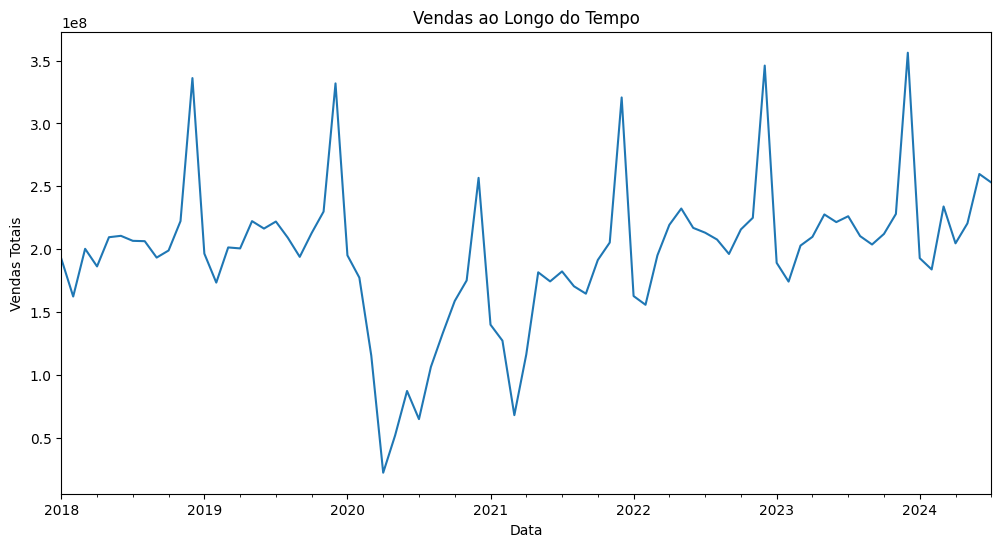

In [9]:
# Plot the sales over time

plt.figure(figsize=(12, 6))
dfvendas.groupby('Data')['Sales'].sum().plot()
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.show()

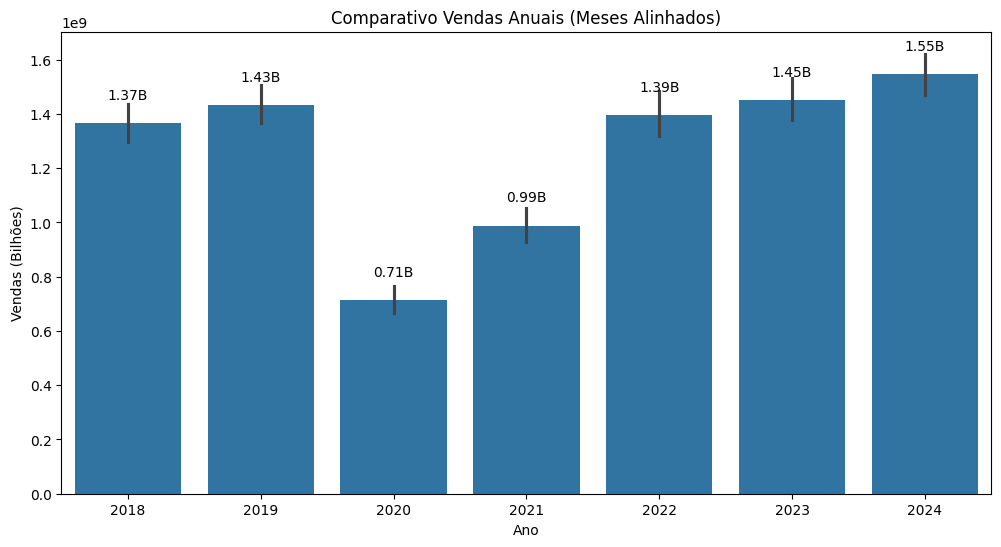

In [10]:
# Delete months for this analysis (Year to Date)

max_month = dfvendas['Data'].max().month
dfsales_YTD = dfvendas[dfvendas['Mês'] <= max_month]

# Plot Anual Sales

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Ano', y='Sales', data=dfsales_YTD, estimator=sum)
ax.bar_label(
    ax.containers[0],
    labels=[f'{x/1e9:.2f}B' for x in ax.containers[0].datavalues],
    fontsize=10, padding=15, color='black'
)
plt.title('Comparativo Vendas Anuais (Meses Alinhados)')
plt.xlabel('Ano')
plt.ylabel('Vendas (Bilhões)')
plt.show()

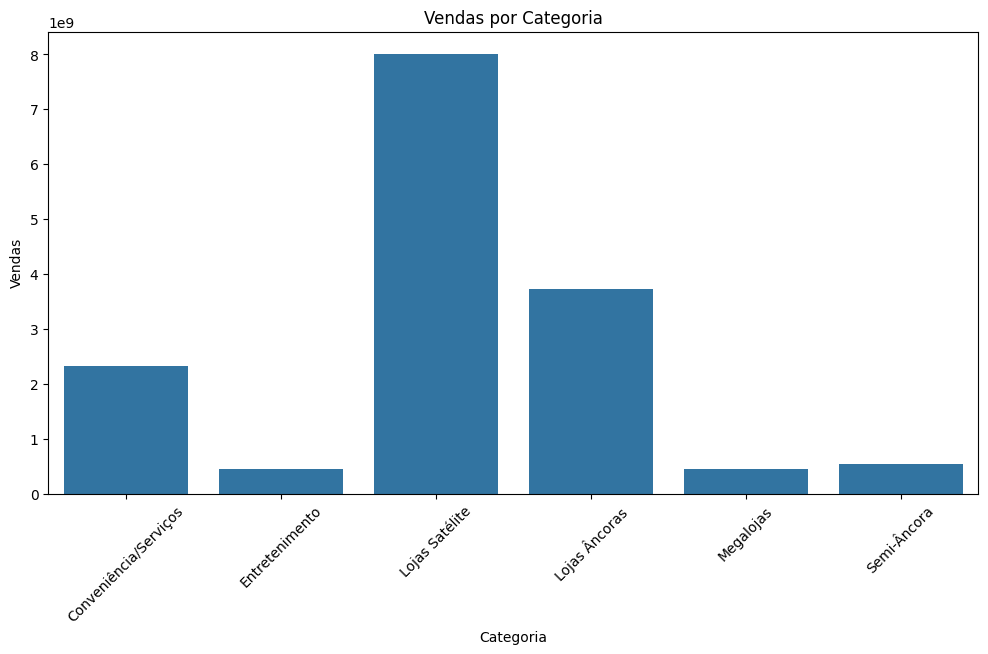

In [11]:
# Plot Sales by category

plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Sales', data = dfvendas.groupby(['Categoria'])['Sales'].sum().reset_index())
plt.title('Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.show()

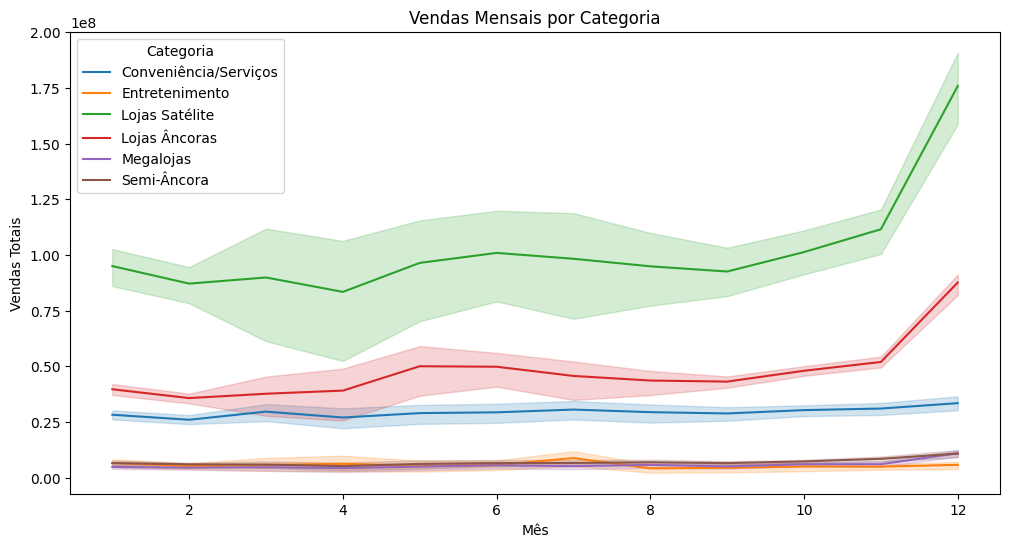

In [12]:
# Plot monthly sales by category

plt.figure(figsize=(12, 6))
sns.lineplot(x='Mês', y='Sales', hue='Categoria', data=dfvendas.groupby(['Ano', 'Mês', 'Categoria'])['Sales'].sum().reset_index())
plt.title('Vendas Mensais por Categoria')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.legend(title='Categoria')
plt.show()

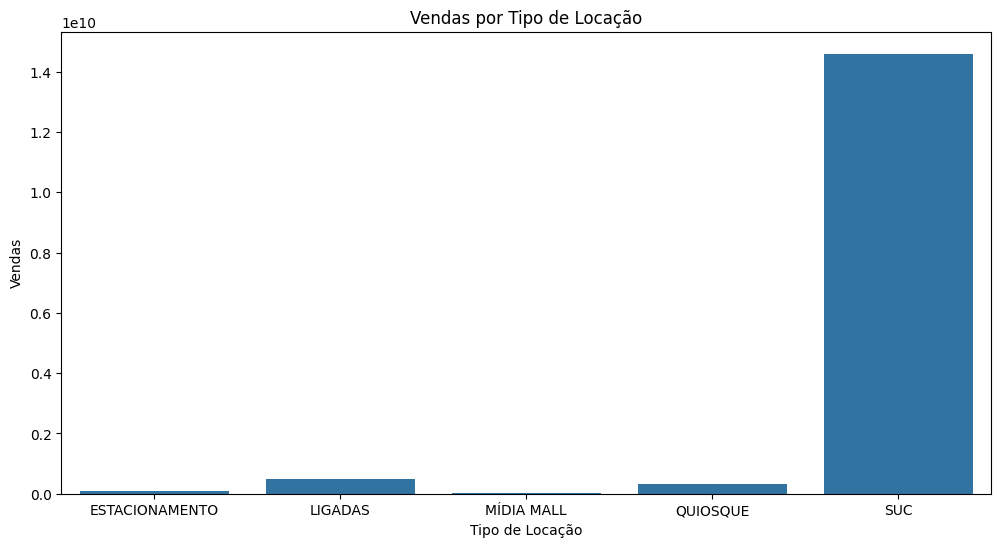

In [13]:
# Sales by tip of rent

plt.figure(figsize=(12, 6))
sns.barplot(x='Tipo de Locação', y='Sales', data = dfvendas.groupby(['Tipo de Locação'])['Sales'].sum().reset_index())
plt.title('Vendas por Tipo de Locação')
plt.xlabel('Tipo de Locação')
plt.ylabel('Vendas')
plt.show()

In [14]:
# Calculate Top 10 segments

top_10_segmentos = dfvendas.groupby('Segmento')['Sales'].sum().nlargest(10).index
df_top_segmentos = dfvendas[dfvendas['Segmento'].isin(top_10_segmentos)]

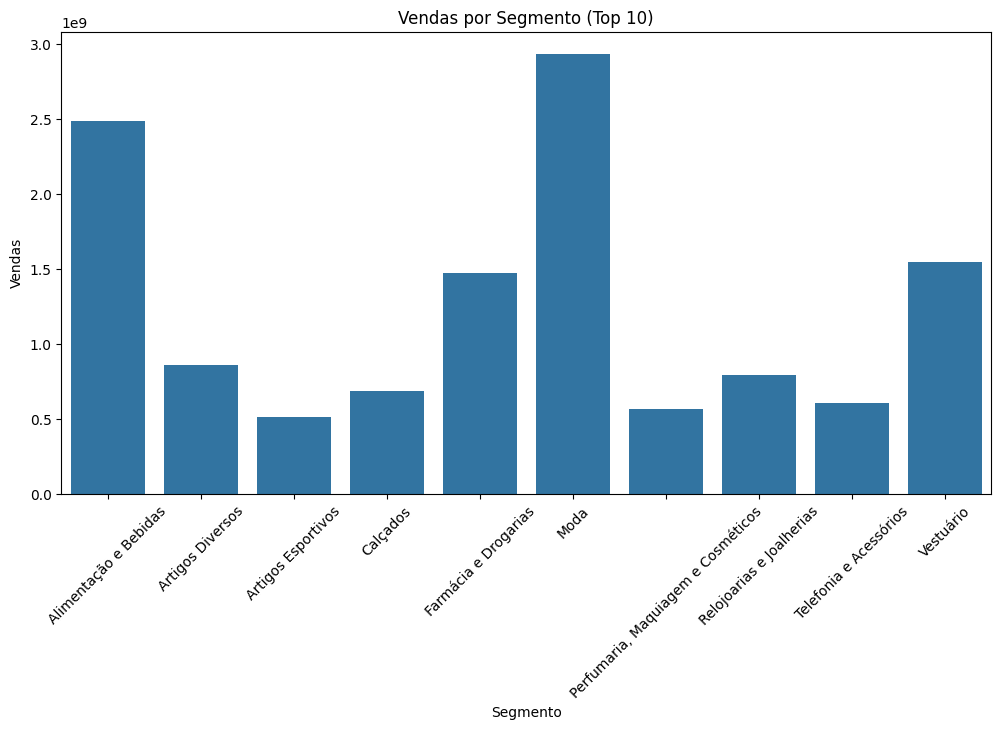

In [15]:
# Plot sales by top 10 segments

plt.figure(figsize=(12, 6))
sns.barplot(x='Segmento', y='Sales', data=df_top_segmentos.groupby(['Segmento'])['Sales'].sum().reset_index())
plt.title('Vendas por Segmento (Top 10)')
plt.xlabel('Segmento')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.show()

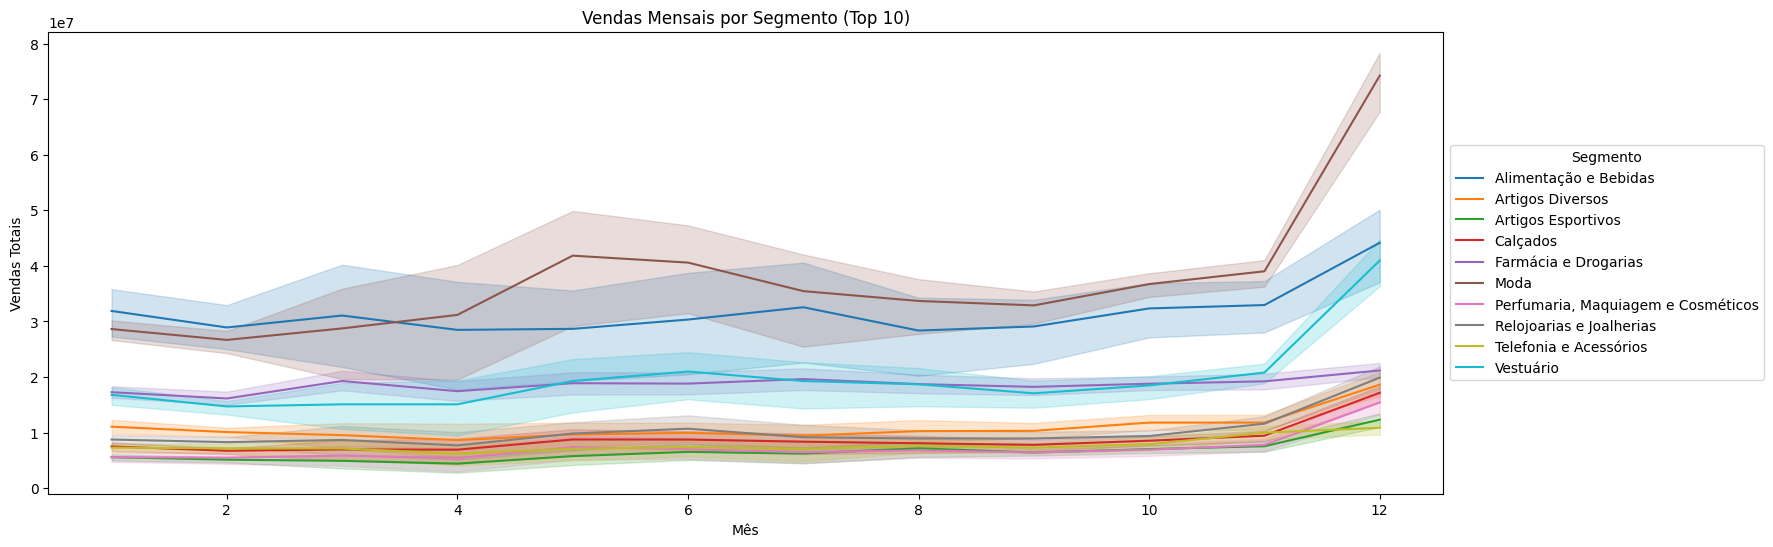

In [16]:
# Plot monthly sales by segment

plt.figure(figsize=(18, 6))
sns.lineplot(x='Mês', y='Sales', hue='Segmento', data=df_top_segmentos.groupby(['Ano','Mês', 'Segmento'])['Sales'].sum().reset_index())
plt.title('Vendas Mensais por Segmento (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.legend(title='Segmento', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

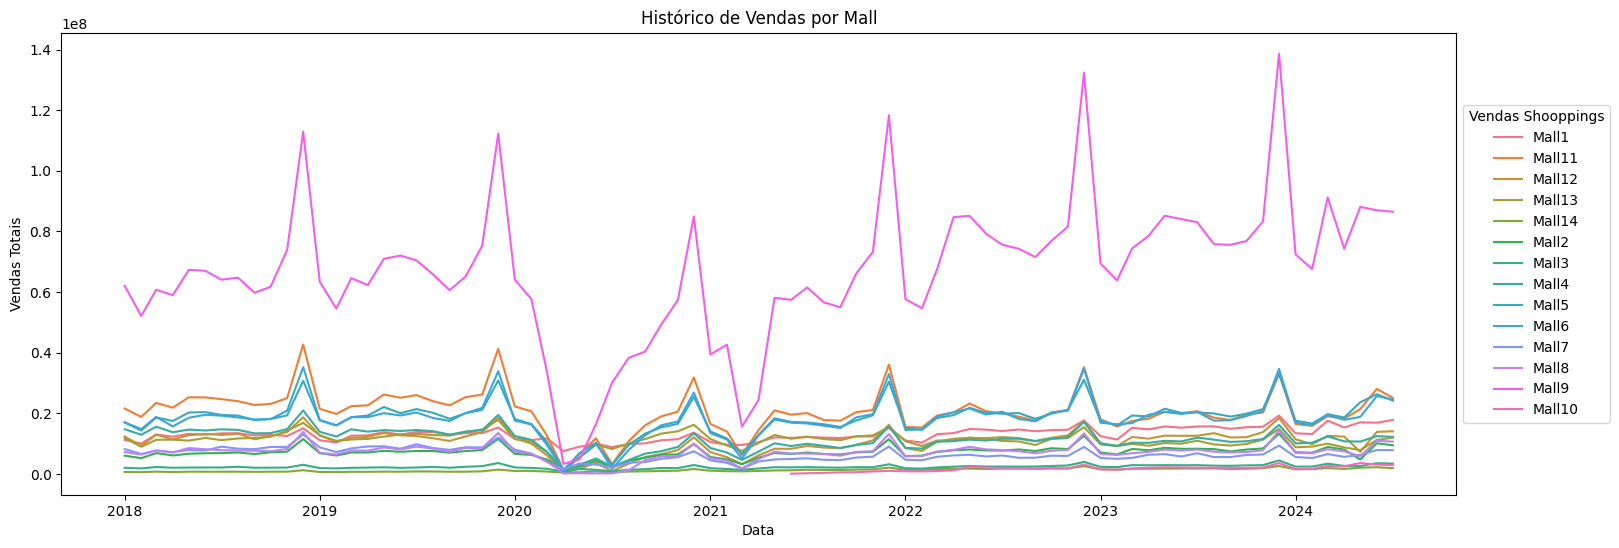

In [17]:
# Plot Sales by Mall

plt.figure(figsize=(18, 6))
sns.lineplot(x='Data', y='Sales', hue='Mall', data=dfvendas.groupby(['Data', 'Mall'])['Sales'].sum().reset_index())
plt.title('Histórico de Vendas por Mall')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.legend(title='Vendas Shooppings', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

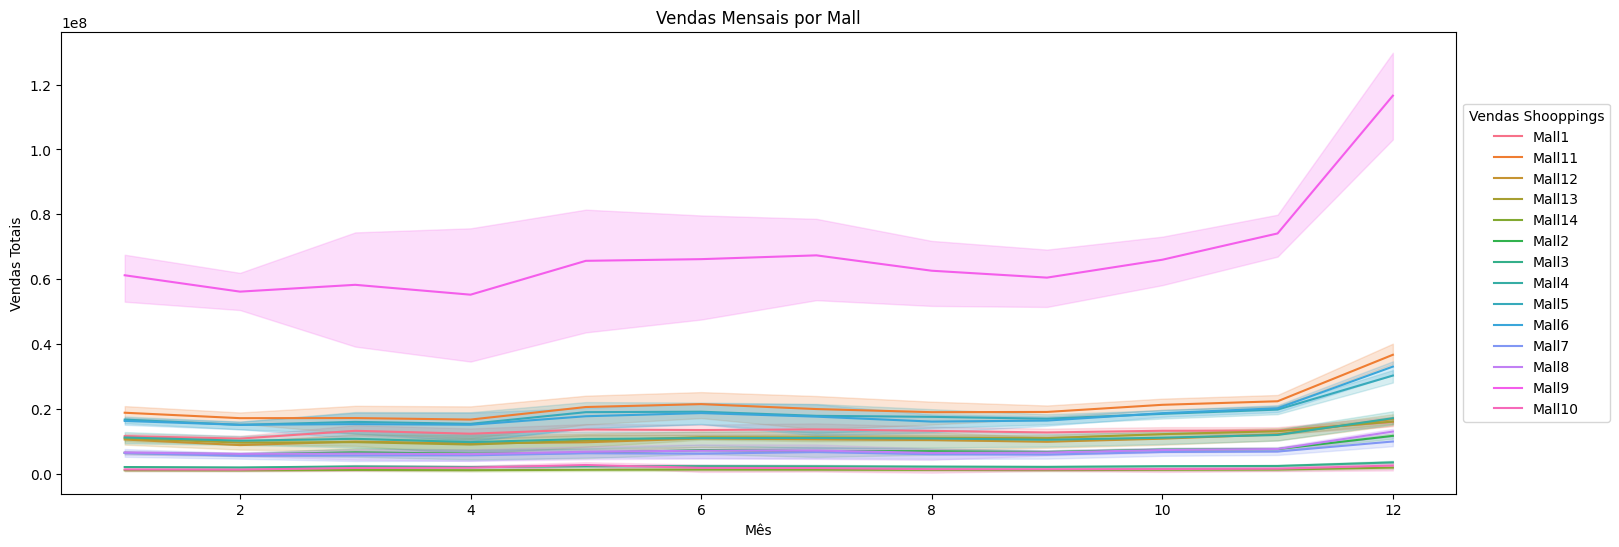

In [18]:
# Plot Monthly sales by Mall

plt.figure(figsize=(18, 6))
sns.lineplot(x='Mês', y='Sales', hue='Mall', data=dfvendas.groupby(['Ano', 'Mês', 'Mall'])['Sales'].sum().reset_index())
plt.title('Vendas Mensais por Mall')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.legend(title='Vendas Shooppings', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Model Selection and Training

To improve the model's accuracy, I decided to remove the months corresponding to the peak of the pandemic from the dataset (the mae and R2 metrics increase significantly). These months were marked by unprecedented disruptions in consumer behavior, store operations, and overall economic activity, leading to extreme and atypical sales patterns that are unlikely to repeat under normal conditions. Including these outliers could skew the model's predictions, making it less reliable for forecasting future sales trends under typical market conditions. By excluding these months, we aim to create a more robust and accurate model that reflects standard business environments.

In [19]:
# Remove Covid period

dfvendas = dfvendas[~((dfvendas['Data'] >= '2020-03-01') & (dfvendas['Data'] <= '2021-08-01'))]

Statistical Evaluation

In [20]:
dfvendasS = dfvendas.groupby(['Data'])['Sales'].sum().reset_index()
dfvendasS.index = dfvendasS['Data']
dfvendasS = dfvendasS['Sales']

In [21]:
# kpss test

ndiffs(dfvendasS, test='kpss')

0

In [22]:
# augmented dickey-fuller

ndiffs(dfvendasS, test='adf')

0

In [23]:
# Osborn-Chui-Smith-Birchenhall test

nsdiffs(dfvendasS, test='ocsb', m=4)

0

In [24]:
# Canova-Hansen test

nsdiffs(dfvendasS, test='ch', m=4)

0

Based on the results of the stationarity tests, we can draw the following conclusion:

The results of the KPSS, ADF, OCSB, and CH tests all indicate that the time series data is stationary. The KPSS test does not reject the null hypothesis, suggesting there is no unit root and that the series is trend-stationary. The ADF test also supports this by rejecting its null hypothesis, confirming that the data is stationary without a unit root. The OCSB test indicates that there are no seasonal unit roots, meaning the seasonal patterns in the data are stable over time. Finally, the CH test confirms that the seasonal components are stationary as well. These results collectively suggest that the data is stable and suitable for modeling without requiring additional transformations for stationarity.

Label Encoding

In [25]:
dfvendas.nunique()

,0
Mall,14
Cod_client,2125
Sales,61300
Categoria,6
Segmento,46
Tipo de Locação,5
Classificação,37
Data,61
Ano,7
Mês,12


In [26]:
# Label Encoder

le = LabelEncoder()
dfvendas['Mall_num'] = le.fit_transform(dfvendas['Mall'])
dfvendas['Categoria_num'] = le.fit_transform(dfvendas['Categoria'])
dfvendas['Tipo de Locação_num'] = le.fit_transform(dfvendas['Tipo de Locação'])

<ipython-input-26-e0f0e03199c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvendas['Mall_num'] = le.fit_transform(dfvendas['Mall'])
<ipython-input-26-e0f0e03199c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvendas['Categoria_num'] = le.fit_transform(dfvendas['Categoria'])
<ipython-input-26-e0f0e03199c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [27]:
# Frequency Encoding

freq = dfvendas['Segmento'].value_counts()
dfvendas['Segmento_num'] = dfvendas['Segmento'].map(freq)

freq2 = dfvendas['Classificação'].value_counts()
dfvendas['Classificação_num'] = dfvendas['Classificação'].map(freq2)

<ipython-input-27-8ed78715e741>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvendas['Segmento_num'] = dfvendas['Segmento'].map(freq)
<ipython-input-27-8ed78715e741>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvendas['Classificação_num'] = dfvendas['Classificação'].map(freq2)


Model Selection and Training

In [28]:
# Set model dataframe

df_forecast = dfvendas.groupby(['Data','Mall_num','Segmento_num','Mês','Ano'])['Sales'].sum().reset_index()
df_forecast.index = df_forecast['Data']
df_forecast = df_forecast.drop('Data',axis=1)

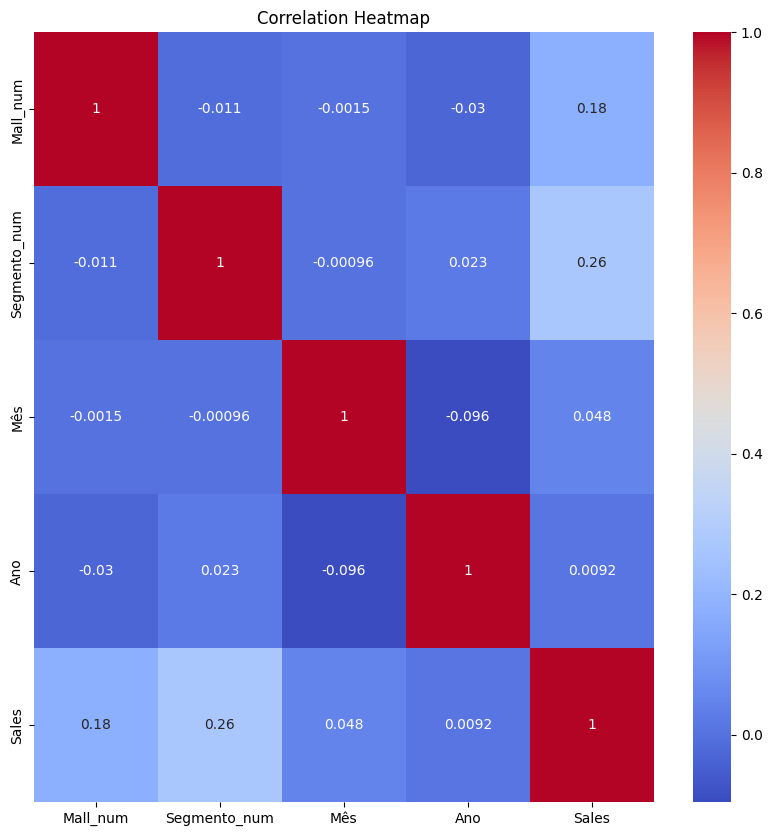

In [29]:
# correlation heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df_forecast.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# create train and test dataframes

data = '2023-08-01' # 20% of the dataframe

X = df_forecast.drop('Sales',axis=1)
y = df_forecast['Sales']

x_train = X[X.index < data]
x_test = X[X.index >= data]
y_train = y[y.index < data]
y_test = y[y.index >= data]

In [31]:
model_list = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=10),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

In [32]:
# Cross-Validation

cv = TimeSeriesSplit(n_splits=5)

err_by_method_income = {}
for method in model_list:
    print(f'Running model: {method}')
    cv_error = cross_val_score(model_list[method],
                               x_train,
                               y_train,
                               cv=cv,
                               scoring='neg_mean_absolute_error')

    err_by_method_income[method] = -np.mean(cv_error)

Running model: Ridge
Running model: Lasso
Running model: RandomForestRegressor
Running model: DecisionTreeRegressor
Running model: KNeighborsRegressor


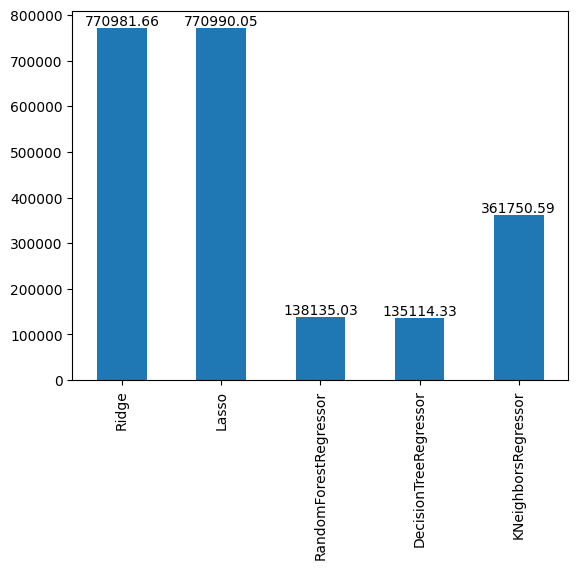

In [33]:
# Plot Results
err_series = pd.Series(err_by_method_income)
ax = err_series.plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

Model Evaluation

In [34]:
# Hyperparameter Tuning with GridSearchCV

def train_decision_tree(x_train, x_test, y_train, y_test):
    # Defina os parâmetros que você deseja testar
    param_grid = {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Instancie o regressor de árvore de decisão
    regressor = DecisionTreeRegressor(random_state=42)

    # Use GridSearchCV para encontrar os melhores parâmetros
    grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Pegue o melhor modelo encontrado
    best_regressor = grid_search.best_estimator_

    # Faça previsões com o melhor modelo
    y_test_pred = best_regressor.predict(x_test)

    # Calcule as métricas de erro
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Imprima os melhores parâmetros e as métricas de erro
    print('Avalição Modelo Decision Tree')
    print("Melhores parâmetros encontrados:", grid_search.best_params_)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    # Retorne o melhor modelo e as previsões
    return best_regressor, y_test_pred

# Exemplo de uso:
best_model, y_test_pred = train_decision_tree(x_train, x_test, y_train, y_test)


Avalição Modelo Decision Tree
Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE): 117758744722.08386
Mean Absolute Error (MAE): 125172.64388123661
R^2 Score: 0.9713430831768944


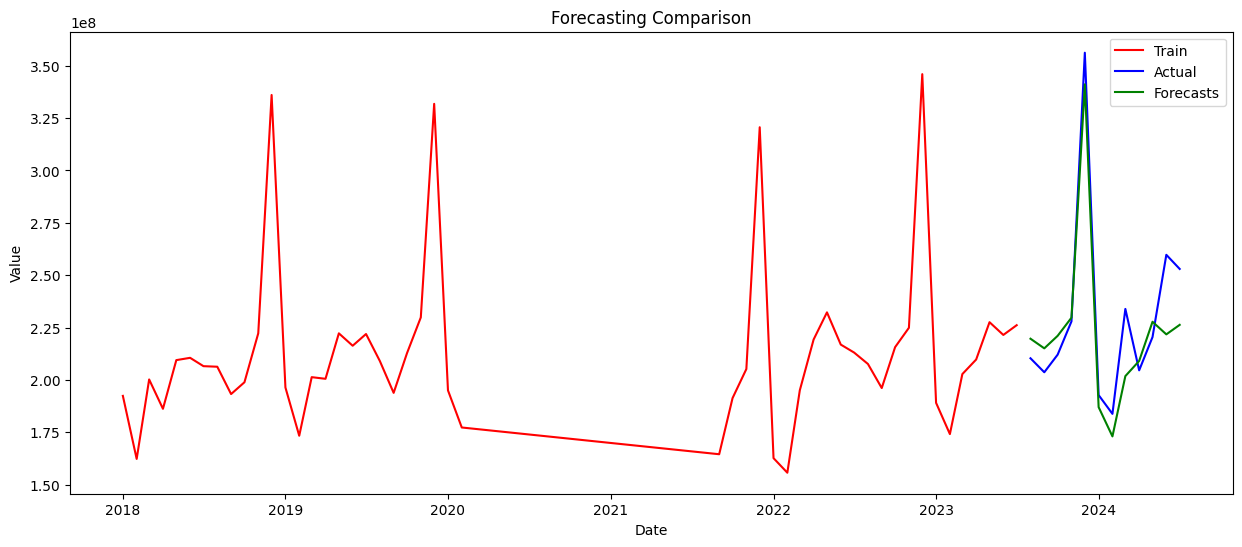

In [35]:
# Plot comparison

previsoes = pd.Series(y_test_pred, index=y_test.index, name='Forecasts')

y_train_grouped = y_train.groupby(y_train.index).sum()
y_test_grouped = y_test.groupby(y_test.index).sum()
previsoes_grouped = previsoes.groupby(previsoes.index).sum()

plt.figure(figsize=(15, 6))
plt.plot(y_train_grouped.index, y_train_grouped, label='Train', color='red')
plt.plot(y_test_grouped.index, y_test_grouped, label='Actual', color='blue')
plt.plot(previsoes_grouped.index, previsoes_grouped, label='Forecasts', color='green')

plt.title('Forecasting Comparison')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Forecasting Future Sales


In [36]:
dfprev = pd.read_excel('/content/drive/My Drive/Portfólio/Store Sales/prev.xlsx')
dfprev.index = dfprev['Data']
dfprev = dfprev.drop('Data',axis=1)

In [37]:
# Train full database

X = df_forecast.drop('Sales',axis=1)
Y = df_forecast['Sales']

best_model.fit(X, Y)

# Forecast

forecast_prev = best_model.predict(dfprev)

dfprev['Sales_Pred'] = forecast_prev

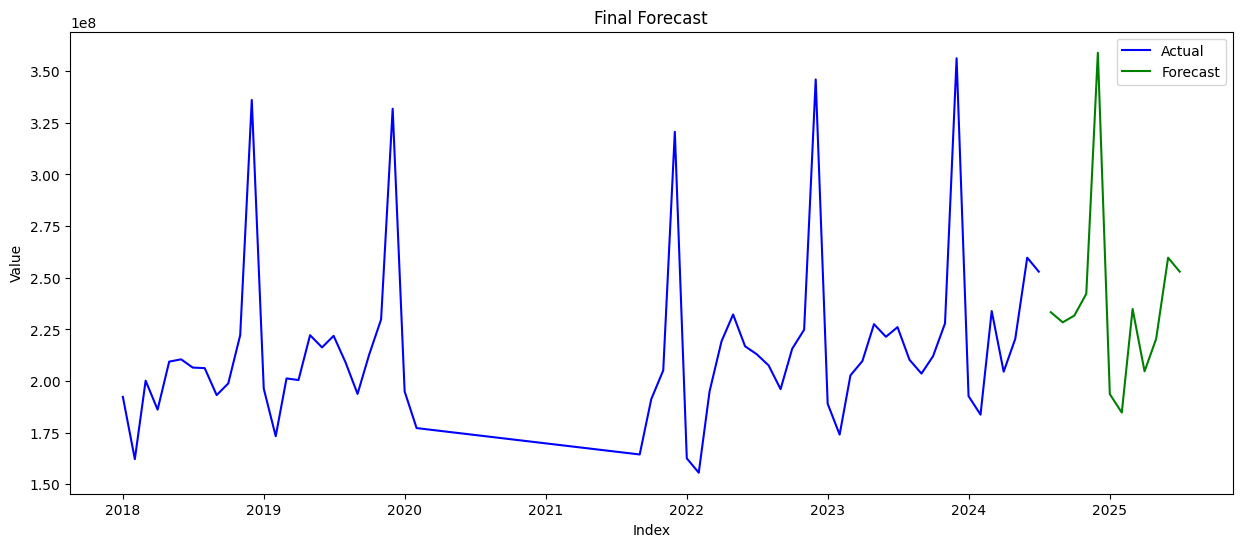

In [38]:
# Plot forecast Sales

Y_grouped = Y.groupby(Y.index).sum()
pred_grouped = dfprev.groupby(dfprev.index)['Sales_Pred'].sum()

plt.figure(figsize=(15, 6))
plt.plot(Y_grouped.index, Y_grouped, label='Actual', color='blue')
plt.plot(pred_grouped.index, pred_grouped, label='Forecast', color='green')

plt.title('Final Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

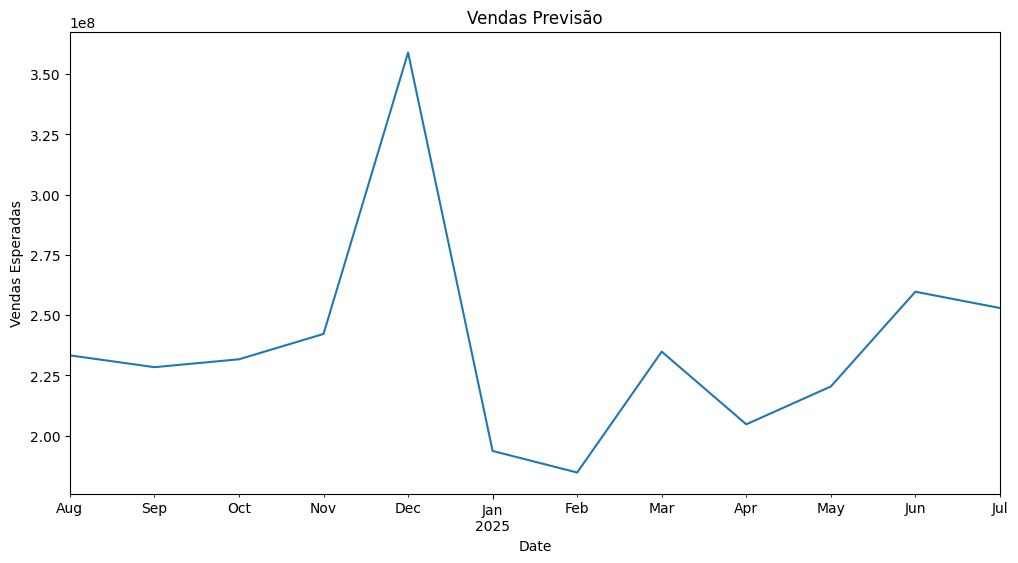

In [39]:
# Plot the forecast sales

plt.figure(figsize=(12, 6))
pred_grouped.plot()
plt.title('Vendas Previsão')
plt.xlabel('Date')
plt.ylabel('Vendas Esperadas')
plt.show()

Since the data model was built by segment and by shopping mall, it allows for detailed individual analyses. This granularity enables us to evaluate performance and trends for each specific segment and mall, providing valuable insights that can inform targeted strategies and decision-making.

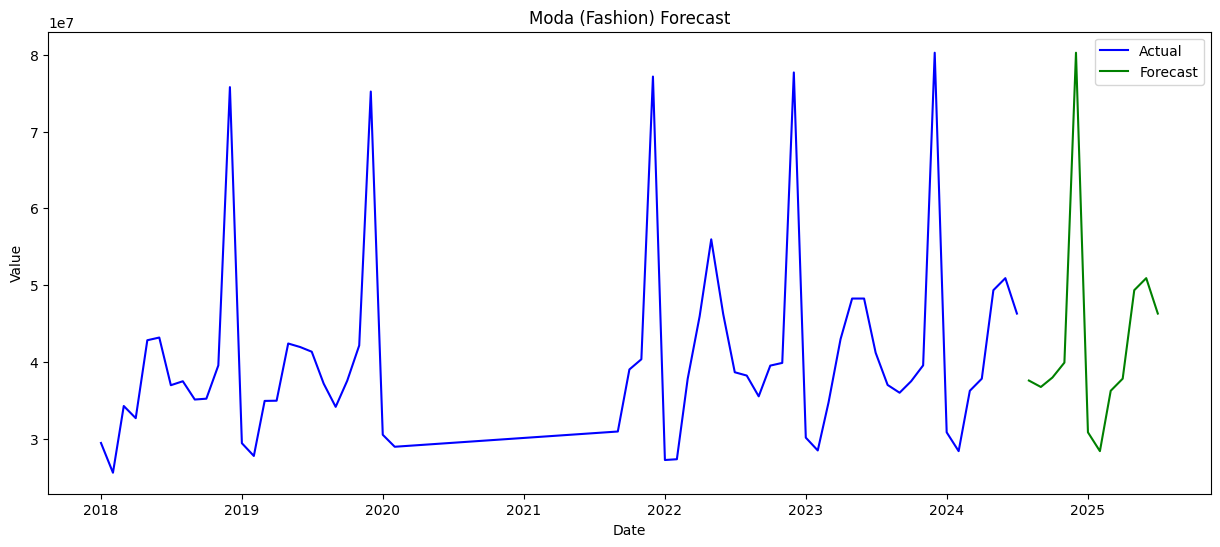

In [40]:
# Plot Forecast Sales on Moda (Fashion)

Y_grouped = df_forecast[df_forecast['Segmento_num'] == 1612].groupby(['Data'])['Sales'].sum()
pred_grouped = dfprev[dfprev['Segmento_num'] == 1612].groupby(['Data'])['Sales_Pred'].sum()

plt.figure(figsize=(15, 6))
plt.plot(Y_grouped.index, Y_grouped, label='Actual', color='blue')
plt.plot(pred_grouped.index, pred_grouped, label='Forecast', color='green')

plt.title('Moda (Fashion) Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

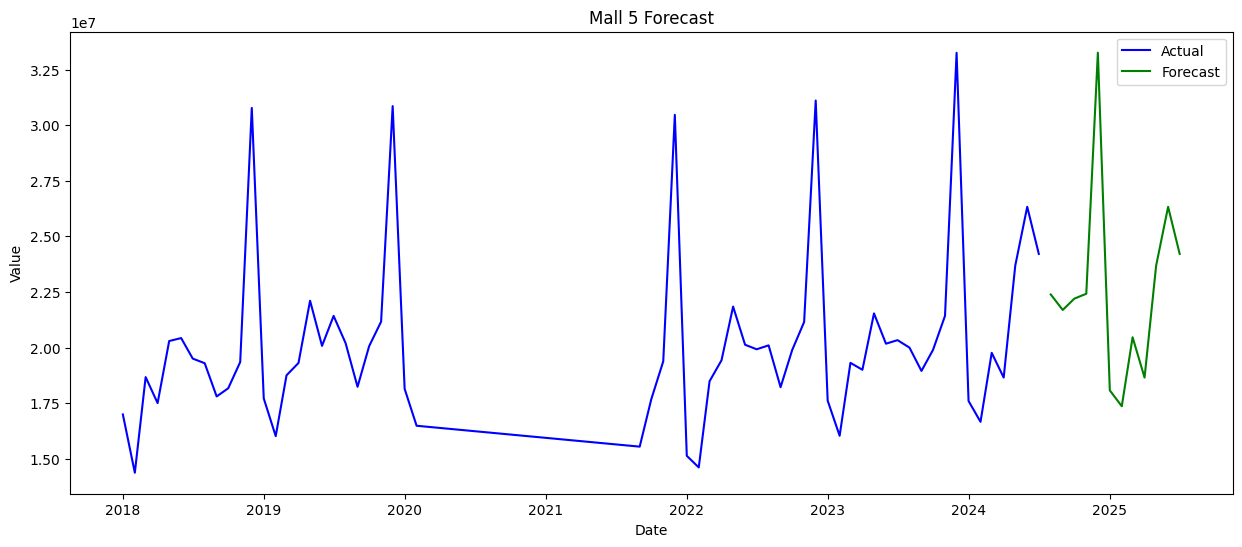

In [41]:
# Plot Forecast Sales on Mall 5

Y_grouped = df_forecast[df_forecast['Mall_num'] == 9].groupby(['Data'])['Sales'].sum()
pred_grouped = dfprev[dfprev['Mall_num'] == 9].groupby(['Data'])['Sales_Pred'].sum()

plt.figure(figsize=(15, 6))
plt.plot(Y_grouped.index, Y_grouped, label='Actual', color='blue')
plt.plot(pred_grouped.index, pred_grouped, label='Forecast', color='green')

plt.title('Mall 5 Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### Conclusion

In finalizing the sales prediction model, we first confirmed the stationarity of the time series data, as all stationarity tests—KPSS, ADF, OCSB, and CH—returned results indicating no unit roots, confirming data stability. We proceeded to calculate sales by segment and chose the Decision Tree Regressor for our predictive model. This model was fine-tuned using hyperparameter optimization to achieve the best negative mean absolute error.

The Decision Tree model's performance was evaluated with the R² Score of 97%, indicating a strong predictive capability. The model forecasts an 3% increase in total sales over the next 12 months compared to the same period in the previous year. This forecast provides a valuable insight for strategic planning and decision-making.